## IMPORTS

In [1]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Data Preprocessing

In [2]:
# Data Cleaning on the text for overall sentiment analysis
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)


# Data cleaning for aspect based sentiment analysis
def data_processing_absa(text):
    text = text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'\\','',text)
    return text

#Stemmatization of words
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

## To predict a review

In [3]:
#getting the model
import joblib
model = joblib.load('LR_LSVC_NB.pkl')
vect = joblib.load('tfidf_vectorizer.pkl')

In [4]:
#Overall sentiment analysis
def get_overall_sentiment(review):
    review = data_processing(review)
    review = stemming(review)
    review = vect.transform([review])
    prediction = model.predict(review)[0]
    sentiment_label = "Positive" if prediction == 1 else "Negative"
    return sentiment_label

In [5]:
review = """ The film's strong performances and witty dialogue made it a truly enjoyable experience. The well-paced storyline kept me engaged throughout, and the clever twists and turns added to the excitement. However, the lack of depth in the characters and the predictable ending were disappointing. Despite these minor shortcomings, the film is a fun and entertaining watch. """
print(get_overall_sentiment(review))

Positive


In [6]:
review  = data_processing(review)
review = stemming(review)
print(review)

films strong performances witty dialogue made truly enjoyable experience wellpaced storyline kept engaged throughout clever twists turns added excitement however lack depth characters predictable ending disappointing despite minor shortcomings film fun entertaining watch


## The Aspect Dictionary

In [7]:
#aspects
movie_aspects = {
    "acting": ["performances", "actors", "acting", "cast", "role", "character portrayal","performance",
    "portrayal",
    "playing",
    "depiction",
    "characterization",
    "enactment",
    "rendition",
    "interpretation",
    "presentation",
    "embodiment",
    "realization",
    "execution",
    "delivery",
    "projection",
    "articulation",
    "expression",
    "conveying",
    "communication"],
    "direction": ["direction", "director", "filmmaking", "directing", "vision",
    "helming",
    "visual style",
    "cinematography",
    "pacing",
    "rhythm",
    "tone",
    "atmosphere",
    "mood",
    "world-building",
    "storytelling",
    "narrative",
    "craftsmanship",
    "technical prowess",
    "visionary",
    "innovation"],
    "plot": ["storyline", "plot", "narrative", "story", "screenplay", "script", "twist","storyline",
    "premise",
    "concept",
    "message",
    "subtext",
    "arc",
    "journey",
    "progression",
    "development",
    "resolution",
    "climax",
    "twist",
    "turn",
    "surprise",
    "reveal",
    "foreshadowing",
    "pacing",
    "tension",
    "suspense",
    "excitement",
    "drama",
    "comedy",
    "romance",
    "horror",
    "sci-fi",
    "fantasy",
    "action",
    "adventure",
    "mystery",
    "thriller",
    "crime",
    "historical",
    "biographical",
    "documentary",
    "animated",
    "formulaic"],
    "cinematography": ["cinematography", "visuals", "camera work", "shots", "framing", "scenes", "filming","cinematography",
    "visual style",
    "lighting",
    "color palette",
    "composition",
    "framing",
    "shot",
    "angle",
    "perspective",
    "movement",
    "camera work",
    "lens",
    "filter",
    "texture",
    "atmosphere",
    "tone",
    "realism",
    "surrealism",
    "expressionism",
    "naturalism",
    "stylization",
    "classicism",
    "modernism",
    "postmodernism",
    "dynamic",
    "static",
    "fluid",
    "choppy",
    "cinematic",
    "filmic",
    "photographic",
    "painterly"],
    "soundtrack": ["soundtrack", "music", "score", "songs", "background music", "sound effects",
    "music",
    "sound design",
    "sound effects",
    "audio",
    "ambiance",
    "original",
    "classic",
    "contemporary"],
    "visual_effects": ["VFX", "CGI", "visual effects", "special effects", "animation","computer graphics",
    "digital effects",
    "post-production",
    "animation",
    "motion graphics",
    "matte painting",
    "green screen",
    "blue screen",
    "compositing",
    "rendering",
    "modeling",
    "texturing",
    "animating",
    "innovative",
    "cutting-edge",
    "photorealistic",
    "cartoonish"],
    "editing": ["editing", "pacing", "transitions", "cuts","montage",
    "cut",
    "splice",
    "transition",
    "jump cut",
    "parallel editing",
    "flow"],
    "dialogue": ["dialogue", "lines", "conversations", "quotes", "script","script",
    "screenplay",
    "writing",
    "wordplay",
    "conversation",
    "monologue"],
    "set_design": ["set design", "production design", "sets", "locations", "scenery","production design",
    "art direction",
    "scenery",
    "period",
    "era",
    "place",
    "location",
    "environment",
    "world-building"],
    "costume_design": ["costumes", "wardrobe", "outfits", "clothing", "costume design","wardrobe",
    "costumes",
    "clothing",
    "apparel",
    "attire",
    "garments",
    "dresses",
    "suits",
    "uniforms",
    "accessories",
    "jewelry",
    "shoes",
    "hats",
    "makeup",
    "hair",
    "wigs",
    "prosthetic makeup"],
    "themes": ["themes", "message", "morals", "symbolism","theme",
    "messages",
    "moral",
    "lesson",
    "idea",
    "concept",
    "subject",
    "topic",
    "issue",
    "problem",
    "conflict"]
}

## Aspect Based Sentiment Analysis
to predict the sentiment of the aspects in the reviews

In [8]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

#aspect identification from review
def identify_aspects(review, aspect_dict):
    identified_aspects = {}
    for aspect, keywords in aspect_dict.items():
        for keyword in keywords:
            if keyword in review.lower():
                if aspect not in identified_aspects:
                    identified_aspects[aspect] = []
                identified_aspects[aspect].append(keyword)
    return identified_aspects.keys()

# Function to split a review into sentences
def split_into_sentences(review):
    sentences = sent_tokenize(review)
    return sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# to get the sentences where the aspects have been found
def get_aspect_sentences(review):
    sentences = split_into_sentences(review)
    aspect_sentences = {}

    # Loop through each sentence
    for sentence in sentences:
        for aspect, keywords in movie_aspects.items():
            for keyword in keywords:
                # Check if keyword is in the sentence
                if keyword in sentence.lower():
                    if aspect not in aspect_sentences:
                        aspect_sentences[aspect] = []
                    aspect_sentences[aspect].append(sentence)

    return aspect_sentences

In [10]:
# to get all the sentiments of the review entered
def get_overall_sentiment_of_review(review):
    clean_review = data_processing(review)
    clean_review = stemming(clean_review)
    clean_review_absa = data_processing_absa(review)
    aspect_sentence_dict = get_aspect_sentences(clean_review_absa)
    aspect_sentiments = {}
    aspect_sentiment_results = []
    sentiments = []

    # Apply sentiment analysis for each aspect's sentence
    for aspect, sentence in aspect_sentence_dict.items():
        sentence_features = vect.transform(sentence)
        sentiment_result = model.predict(sentence_features)[0]  # Get sentiment for the sentence
        sentiment_label = "positive" if sentiment_result == 1 else "negative"
        aspect_sentiments[aspect] = sentiment_label  # Store result as 'positive' or 'negative'
    # Append aspect sentiments for the current review
    aspect_sentiment_results.append(aspect_sentiments)
    print(get_overall_sentiment(clean_review))
    print(aspect_sentiment_results)

In [11]:
get_overall_sentiment_of_review(review)

Positive
[{'acting': 'positive', 'plot': 'positive', 'dialogue': 'positive'}]


## For the whole Dataset

In [12]:
# to get the sentiment of the aspects of the whole dataset
def analyze_aspect_sentiments(df, aspect_sentences_col='sentences'):

    # Initialize a list to store results for each review
    aspect_sentiment_results = []

    # Iterate over each row in the DataFrame
    for aspect_sentence_dict in df[aspect_sentences_col]:
        aspect_sentiments = {}

        # Predict sentiment for each aspect's sentence
        for aspect, sentence in aspect_sentence_dict.items():
            # Predict sentiment
            sentence_features = vect.transform(sentence)
            sentiment_pred = model.predict(sentence_features)[0]
            sentiment_label = "positive" if sentiment_pred == 1 else "negative"

            # Store result in aspect_sentiments dictionary
            aspect_sentiments[aspect] = sentiment_label

        # Append aspect sentiments for the current review
        aspect_sentiment_results.append(aspect_sentiments)

    # Add results to DataFrame
    df['aspect_sentiments'] = aspect_sentiment_results

    return df

In [13]:
# to get analysis of whole dataset
import matplotlib.pyplot as plt

def get_analysis(df):
  # Data Cleaning on the text for overall sentiment analysis
  def data_processing(text):
      text= text.lower()
      text = re.sub('<br />', '', text)
      text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
      text = re.sub(r'\@w+|\#', '', text)
      text = re.sub(r'[^\w\s]', '', text)
      text_tokens = word_tokenize(text)
      filtered_text = [w for w in text_tokens if not w in stop_words]
      return " ".join(filtered_text)

  # Data cleaning for aspect based sentiment analysis
  def data_processing_absa(text):
      text = text.lower()
      text = re.sub('<br />', '', text)
      text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
      text = re.sub(r'\@w+|\#', '', text)
      text = re.sub(r'\\','',text)
      return text

  #Stemmatization of words
  stemmer = PorterStemmer()
  def stemming(data):
      text = [stemmer.stem(word) for word in data]
      return data

  #Overall sentiment analysis
  def get_overall_sentiment(review):
      review = data_processing(review)
      review = stemming(review)
      review = vect.transform([review])
      prediction = model.predict(review)[0]
      sentiment_label = "Positive" if prediction == 1 else "Negative"
      return sentiment_label

  #aspect identification from review
  def identify_aspects(review, aspect_dict):
      identified_aspects = {}
      for aspect, keywords in aspect_dict.items():
          for keyword in keywords:
              if keyword in review.lower():
                  if aspect not in identified_aspects:
                      identified_aspects[aspect] = []
                  identified_aspects[aspect].append(keyword)
      return identified_aspects.keys()

  # Function to split a review into sentences
  def split_into_sentences(review):
      sentences = sent_tokenize(review)
      return sentences

  # to get the sentences where the aspects have been found
  def get_aspect_sentences(review):
      sentences = split_into_sentences(review)
      aspect_sentences = {}

      # Loop through each sentence
      for sentence in sentences:
          for aspect, keywords in movie_aspects.items():
              for keyword in keywords:
                  # Check if keyword is in the sentence
                  if keyword in sentence.lower():
                      if aspect not in aspect_sentences:
                          aspect_sentences[aspect] = []
                      aspect_sentences[aspect].append(sentence)

      return aspect_sentences


  # to get the sentiment of the aspects of the whole dataset
  def analyze_aspect_sentiments(df, aspect_sentences_col='sentences'):

      # Initialize a list to store results for each review
      aspect_sentiment_results = []

      # Iterate over each row in the DataFrame
      for aspect_sentence_dict in df[aspect_sentences_col]:
          aspect_sentiments = {}

          # Predict sentiment for each aspect's sentence
          for aspect, sentence in aspect_sentence_dict.items():
              # Predict sentiment
              sentence_features = vect.transform(sentence)
              sentiment_pred = model.predict(sentence_features)[0]
              sentiment_label = "positive" if sentiment_pred == 1 else "negative"

              # Store result in aspect_sentiments dictionary
              aspect_sentiments[aspect] = sentiment_label

          # Append aspect sentiments for the current review
          aspect_sentiment_results.append(aspect_sentiments)

      # Add results to DataFrame
      df['aspect_sentiments'] = aspect_sentiment_results

      return df


  df['cleaned_review'] = df['review'].apply(lambda x: data_processing(x))
  df['cleaned_review_absa'] = df['review'].apply(lambda x: data_processing_absa(x))
  df['overall_sentiment'] = df['cleaned_review'].apply(get_overall_sentiment)
  df['sentences'] = df['cleaned_review_absa'].apply(get_aspect_sentences)
  analyze_aspect_sentiments(df, aspect_sentences_col='sentences')

  aspect_sentiments_df = df['aspect_sentiments'].apply(pd.Series).reset_index().melt(id_vars='index', value_name='sentiment', var_name='aspect').dropna()
  aspect_sentiment_counts = aspect_sentiments_df.groupby(['aspect', 'sentiment']).size().unstack(fill_value=0)
  aspect_sentiment_percentages = aspect_sentiment_counts.div(aspect_sentiment_counts.sum(axis=1), axis=0) * 100

  aspect_sentiment_percentages.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'])
  plt.title("Sentiment Trends by Aspect")
  plt.xlabel("Aspect")
  plt.ylabel("Sentiment Percentage")
  plt.legend(title="Sentiment")
  plt.show()

  import seaborn as sns
  plt.figure(figsize=(8, 6))
  sns.heatmap(aspect_sentiment_percentages, annot=True, cmap="coolwarm", cbar_kws={'label': 'Percentage'})
  plt.title("Aspect Sentiment Heatmap")
  plt.xlabel("Sentiment")
  plt.ylabel("Aspect")
  plt.show()

  sentiment_counts = df['overall_sentiment'].value_counts()

  # Plot bar chart for overall sentiment
  plt.figure(figsize=(6, 4))
  sentiment_counts.plot(kind='bar', color=['lightgreen', 'salmon'])
  plt.title('Sentiment Distribution')
  plt.xlabel('Sentiment')
  plt.ylabel('Count')
  plt.xticks(rotation=0)
  plt.show()


In [14]:
df = pd.read_csv('IMDB Dataset.csv', usecols= ['review'])
df.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


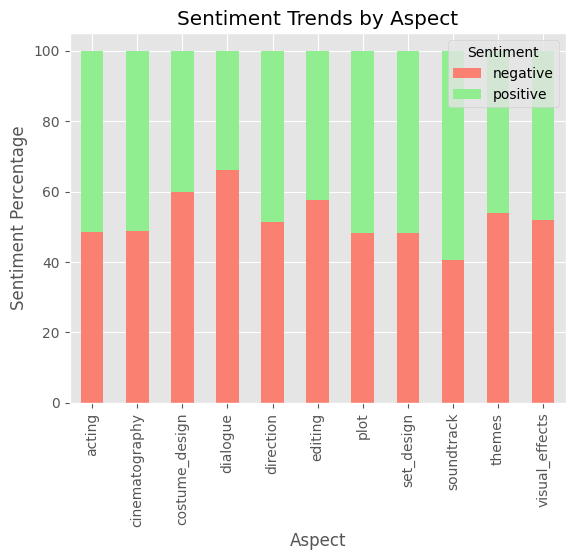

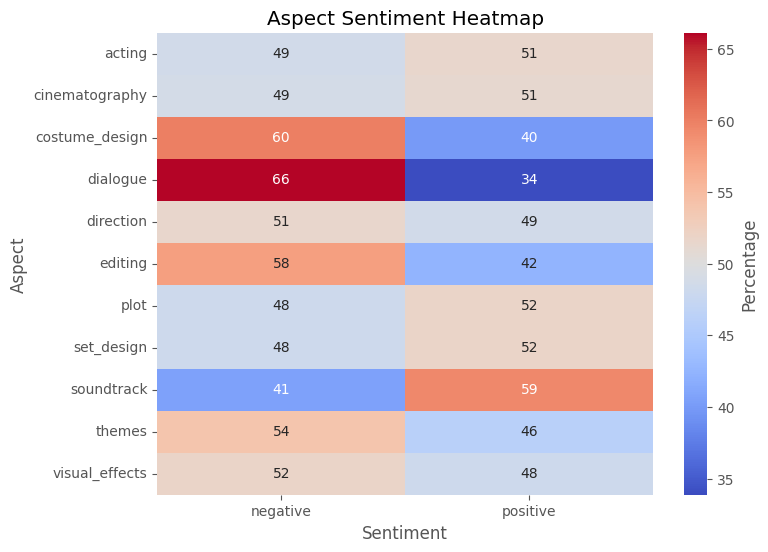

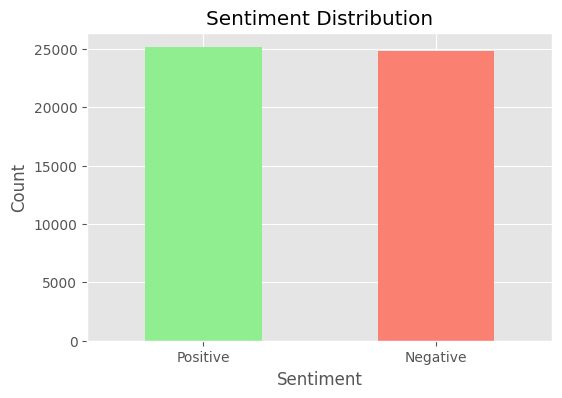

In [15]:
get_analysis(df)

In [16]:
review = """ A rollercoaster of emotions! The actors gave phenomenal performances, and the story was truly heartwarming """
print(get_overall_sentiment(review))

Positive


In [17]:
review = """ Terrible experience. The jokes didn’t land, the acting was subpar, and the entire movie felt like a waste of time """
print(get_overall_sentiment(review))

Negative


In [18]:
review  = data_processing(review)
review = stemming(review)
print(review)

terrible experience jokes didnt land acting subpar entire movie felt like waste time


In [19]:
get_overall_sentiment_of_review(review)

Negative
[{'acting': 'negative'}]
